In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import mannwhitneyu as mwu, tmean as mean
sns.set(style="darkgrid")

Please specifiy the location of the CSV file that Pyexec created

In [2]:
data = pd.read_csv("/path/to/stats.csv")
data = data.replace([-1], pd.NA)
data.columns.values.tolist()

['name',
 'project_on_pypi',
 'github_link_found',
 'github_repo_exists',
 'github_repo_created_at',
 'github_repo_last_updated',
 'github_repo_active_days',
 'github_repo_age',
 'has_setuppy',
 'has_requirementstxt',
 'has_makefile',
 'has_pipfile',
 'loc',
 'num_impl_files',
 'num_test_files',
 'average_complexity',
 'min_python_version',
 'dockerfile_found',
 'dockerfile_source',
 'pip_dependency_count',
 'apt_dependency_count',
 'dockerimage_build_success',
 'testcase_count',
 'testsuit_executed',
 'testsuit_result_parsed',
 'failed',
 'passed',
 'skipped',
 'xfailed',
 'xpassed',
 'warnings',
 'errors',
 'time',
 'covered_lines',
 'num_statements',
 'percentage_covered',
 'missing_lines',
 'excluded_lines']

In [13]:
def pre_success() -> DataFrame:
    return data[data["testsuit_result_parsed"]]

def success() -> DataFrame:
    return pre_success()[pre_success()["testcase_count"] > 0]

hor=["v2", "Pipfile", "setup.py", "requirements.txt"]

# RQ5: Results of successful testcase executions

In the total number of successful test case executions is

In [4]:
len(pre_success())

600

Out of these, so many projcts have at least one test case:

In [5]:
len(success())

596

In [6]:
print("At lest one passing: {}".format(len(success()[success()["passed"] > 0])))
print("At lest one failing: {}".format(len(success()[success()["failed"] > 0])))
print("At lest one xpassing: {}".format(len(success()[success()["xpassed"] > 0])))
print("At lest one xfailing: {}".format(len(success()[success()["xfailed"] > 0])))
print("At lest one skipped: {}".format(len(success()[success()["skipped"] > 0])))
print("At lest one error: {}".format(len(success()[success()["errors"] > 0])))

At lest one passing: 319
At lest one failing: 96
At lest one xpassing: 0
At lest one xfailing: 10
At lest one skipped: 35
At lest one error: 276


In [7]:
_noerror = success()[success()["errors"] == 0]
_haserror = success()[success()["errors"] > 0]
print(len(_noerror))
print(len(_haserror))

320
276


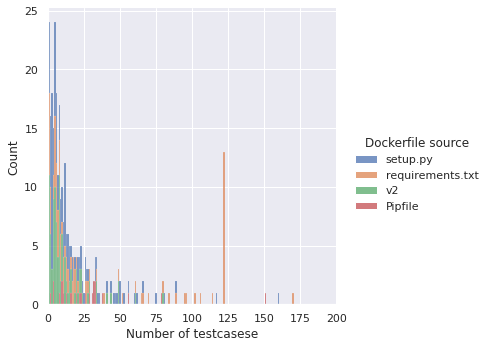

In [8]:
g = sns.displot(_noerror, discrete=True, x="testcase_count", hue="dockerfile_source", hue_order=hor, multiple="stack")
g.legend.set_title(title="Dockerfile source")
g.set(xlabel="Number of testcasese", xlim=(0,200))

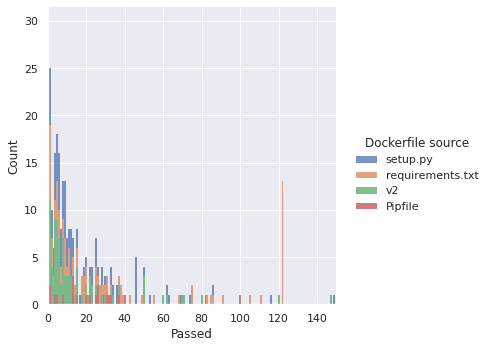

In [9]:
g = sns.displot(_noerror, discrete=True, x="passed", hue="dockerfile_source", hue_order=hor, multiple="stack")
g.legend.set_title(title="Dockerfile source")
g.set(xlabel="Passed", xlim=(0,150))

In [10]:
np.median(_noerror["failed"].dropna())

0.0

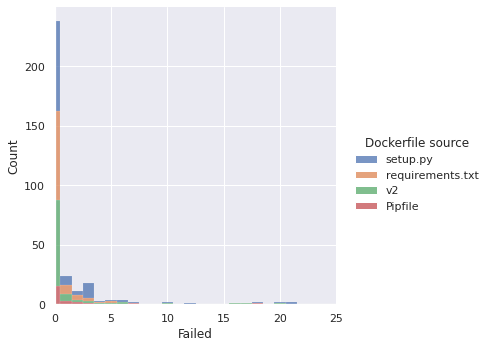

In [11]:
g = sns.displot(_noerror, discrete=True, x="failed", hue="dockerfile_source", hue_order=hor, multiple="stack")
g.legend.set_title(title="Dockerfile source")
g.set(xlabel="Failed", xlim=(0,25))

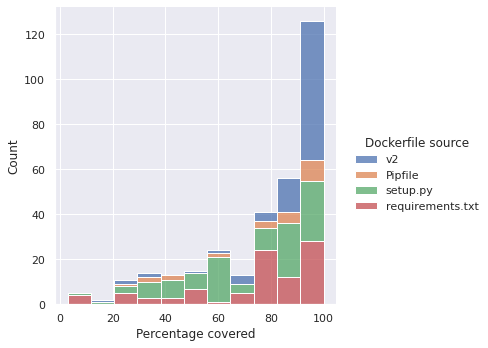

In [14]:
g = sns.displot(_noerror, x="percentage_covered", hue="dockerfile_source", hue_order=hor, multiple="stack")
g.legend.set_title(title="Dockerfile source")
g.set(xlabel="Percentage covered")

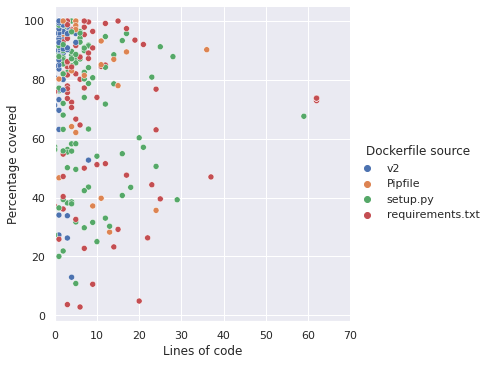

In [15]:
g = sns.relplot(data=_noerror, x="num_impl_files", y="percentage_covered", hue="dockerfile_source", hue_order=hor)
g.set(xlim=(0,70), xlabel="Lines of code", ylabel="Percentage covered")
g.legend.set_title(title="Dockerfile source")